<a href="https://colab.research.google.com/github/jsoldadomagraner/Comp_Neuro-ML_course/blob/main/notebooks/research_projects_notebooks/RNN_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

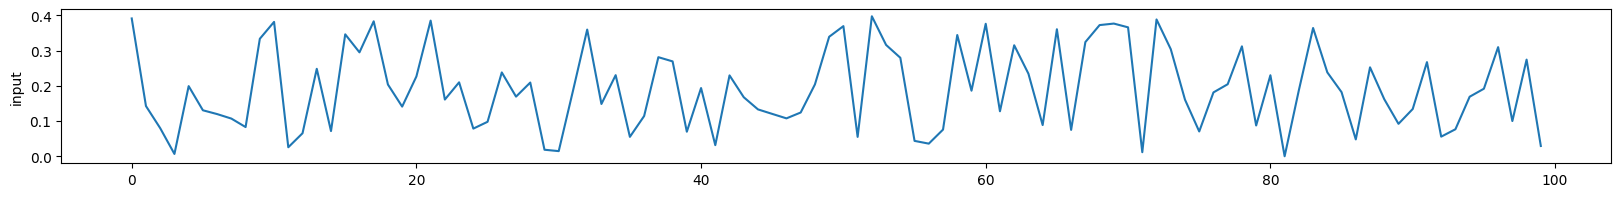

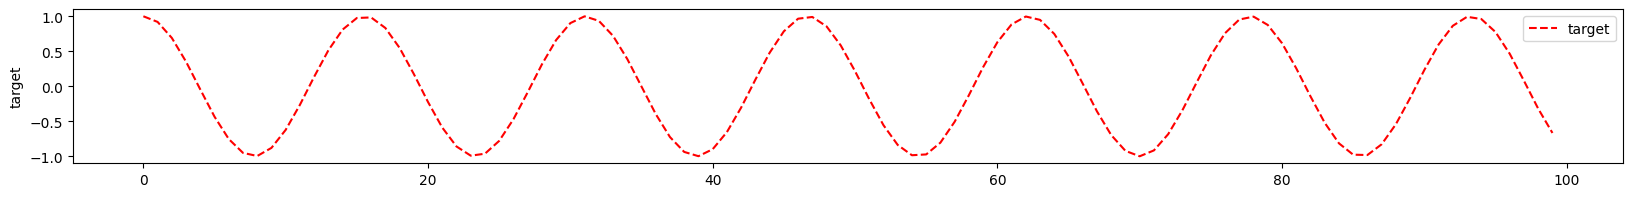

In [108]:
###########################
#Define Inputs and Targets
###########################

n_tsteps = 100

#input is just random noise
inputs = np.random.rand(n_tsteps) * 0.4
#inputs = np.zeros(n_tsteps)
#inputs[0:10] = 1
inputs_tensor = torch.from_numpy(inputs).float()
#inputs_tensor = inputs_tensor[None, None, :]
inputs_tensor = inputs_tensor[:,None,None]

#target is a cosine of frequency freq
freq = 20
x = np.linspace(0,freq,n_tsteps)
target = np.cos(2*x)
target_tensor = torch.from_numpy(target).float().reshape((-1,1,1))

#Plot the inputs and the target
plt.figure(1,figsize=(20, 2))
plt.plot(inputs)
plt.ylabel('input')

plt.figure(2,figsize=(20, 2))
plt.plot(target,'r--',label="target")
plt.ylabel('target')
plt.legend()
plt.show()

In [109]:
print(inputs_tensor.size())
print(target_tensor.size())

torch.Size([100, 1, 1])
torch.Size([100, 1, 1])


In [110]:
###########################
#Define Model
###########################

class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()

        # Number of hidden dimensions (= number of neurons of the recurrent pool)
        self.hidden_dim = hidden_dim

        # Number of hidden layers (if there is there are multiple RNNs)
        self.layer_dim = layer_dim

        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, nonlinearity='relu') #uses the pytorch function for RNN.
        #Layer_dim is the "number of RNNs". Eg. setting layer_di=2 would mean stacking two RNNs together to form a stacked RNN, with the second RNN taking in outputs of the first RNN and computing the final results.

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):

        # Initialize hidden state with zeros
        #h0 = Variable(torch.zeros(self.layer_dim, 1, self.hidden_dim))
        #h0 = Variable(torch.zeros(self.layer_dim, 1, self.hidden_dim))

        # One time step
        out, hn = self.rnn(x)
        out = self.fc(out[:, :])
        return out

## Train model

In [130]:
###########################
#Train model
###########################

n_epochs = 500
losses = []

#model = RNNModel(1000, 100, 1, 1000) #input_dim, hidden_dim, layer_dim, output_dim
model = RNNModel(1, 100, 1, 1) #input_dim, hidden_dim, layer_dim, output_dim

criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

for epoch in range(n_epochs):
    yhat = model(inputs_tensor)
    optimizer.zero_grad()
    loss = criterion(target_tensor, yhat)
    loss.backward()
    optimizer.step()
    #optimizer.zero_grad()
    losses.append(loss.item())
    if epoch % 100 == 0:
      print('Step {}, Loss {:0.4f}'.format(
                epoch, loss))

output = model.forward(inputs_tensor)


Step 0, Loss 0.5094
Step 100, Loss 0.4967
Step 200, Loss 0.4916
Step 300, Loss 0.2963
Step 400, Loss 0.0422


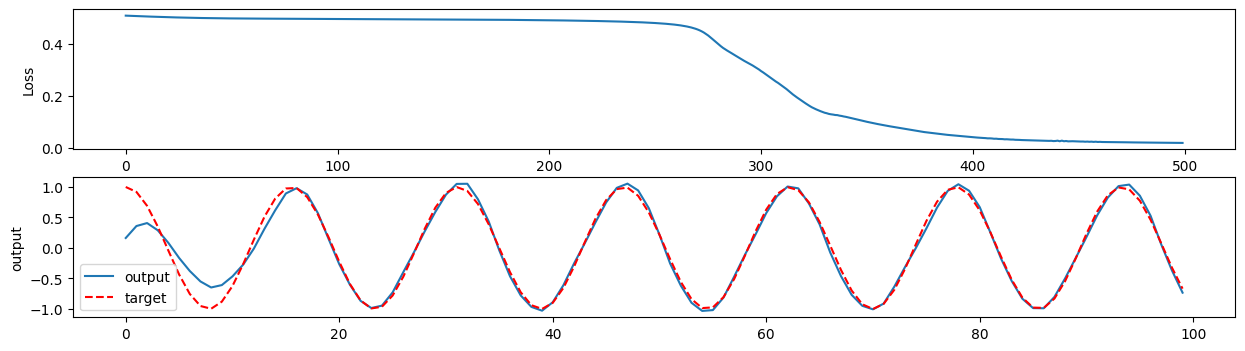

In [131]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 4))

ax1.plot(losses)
ax1.set_ylabel('Loss')

ax2.plot(output.detach().numpy().reshape(-1),label="output")
ax2.plot(target,'r--',label="target")
ax2.set_ylabel('output')
ax2.legend()